# <center>Numerikus modellezés és közönséges differenciálegyenletek numerikus megoldási módszerei II.</center>

## <center>Fekete Imre</center>

### <center>Alkalmazott Analízis és Számításmatematikai Tanszék</center>

<img src="cimer2.jpg" width="400">
<br>
<br>
<br>
<br>

### Általános információk:
+ <span class="fa fa-building-o"></span> Déli Tömb 3.702
+ Honlap: <a href="http://imrefekete.web.elte.hu/" target="_blank"> http://imrefekete.web.elte.hu/</a>
+ Fogadóórák: H 11-12 és Sz 13-14 
+ Kurzushoz kapcsolódó minden anyag megtalálható a kurzus <a href="https://github.com/feipaat/KozdiffNumerikus2-ELTE-"> Github </a> mappájában

### Számonkérés:

+ Hetente beadandó elméleti és/vagy programozási feladatok
+ 1 fős prezentáció egy személyre szabott anyagból 
+ Szorgalmival lehet bónuszpontokat szerezni
<br>

### Irodalom:
#### ELTE-s
+ <a href="http://www.cs.elte.hu/~faragois/jegyzet_Szeged.pdf"> Faragó István: Numerikus modellezés és közönséges differenciálegyenletek numerikus megoldási módszerei </a>
+ <a href="http://tankonyvtar.ttk.bme.hu/authorlistp.jsp?bookId=30">Faragó István, Horváth Róbert: Numerikus módszerek </a>
+ <a href="http://tankonyvtar.ttk.bme.hu/authorlistp.jsp?bookId=117"> Faragó István, Fekete Imre, Horváth Róbert: Numerikus módszerek példatár </a>

#### Ajánlott és további irodalom
Az előző félév ajánlott irodalma kiegészítve az egyik legfontosabb alapkönyvvel
+ <a href="https://bookstore.siam.org/CL13"> Ascher, Mattheij, Russell: Numerical Solution of BVPs for ODEs </a>



### Az előző félév tapasztalataiból kiindulva:

<br>
<br>


<div style="width:870 px"></div>
<div style="float:left"><img src="students.jpg" width="350" title="Nyugodtan kérdezzünk!"/></div>
<div style="float:left"><img src="practice.jpg" width="400" title="A gyakorlás maradjon meg jó szokásunk!"/></div>
<div style="clear:both"></div> 
<br>
<br>

### Miről lesz szó a félév során?

<br>
<br>


<div style="width:870 px">
<div style="float:left"><img src="onevsmulti.jpg" width="400" title="Egylépéses vs. többlépéses módszerek"/></div>
<div style="float:left"><img src="bdfstability.png" width="370" title="BDF1-6 stabilitási tartományok"/></div>
<div style="float:left"><img src="shootingmethod.jpg" width="400" title="Belöléves módszer"/></div> 
<div style="float:left"><img src="laplace.png" width="420" title="Peremérték feladatok"/></div>
<div style="clear:both"></div>
</div>   


<br>
<br>

## <center>Lineáris többlépéses módszerek
<center> <i>"You know, I am a multistep man ... and don't tell anybody, but the first program I wrote for the first Swedish computer was a Runge-Kuta code..."</i><br>
(G. Dahlquist, 1982)</center>
<br>
<div style="width:870 px">
<div style="float:center"><a href="https://en.wikipedia.org/wiki/Germund_Dahlquist" target="blank"><img src="dahlquist.jpg" width="127" title="Germund Dahlquist (1925-2005) Matematikus"/></a></div> 
<div style="clear:both"></div></div> 


<br>
<br>


### Konzisztencia

<b>1.feladat.</b> Taylor-sorfejtés útján határozzuk meg az $y_n-\frac{4}{3}y_{n-1}+\frac{1}{3}y_{n-2}=\frac{2}{3}hf_n$ kétlépéses módszer konzisztencia rendjét!

<b>2.feladat.</b>  Határozzuk meg az $y_n+a_1y_{n-1}+a_2y_{n-2}=h(b_1f_{n-1}+b_2f_{n-2})$ explicit kétlépéses módszer együtthatóit úgy, hogy a konzisztencia rendje minél magasabb legyen!
<br>


<b>3.feladat.</b>  [Házi feladat] Írjunk programot, mely meghatározza a lineáris többlépéses módszer konzisztencia rendjét!

### 0-stabilitás, erős és gyenge stabilitás
<br>

<b>4.feladat.</b>  Oldjuk meg az $y_n-4y_{n-1}+3y_{n-2}=-2hf_{n-2}$ módszerrel az

\begin{cases}
u'(t)= -u(t),\ \ \ t\in[0,1]&\\
u(0)=1 &
\end{cases}

egyenletet $h=1/10$ választással! A módszer elindításához szükséges értékeket a feladat pontos megoldásából adjuk meg. Nézzük meg minden egyes lépés után, hogy a hiba hogyan változik. Konvergens-e a módszer?

<b>5.feladat.</b>  [Házi feladat] Írjunk programot, mely meghatározza a lineáris többlépéses módszerről, hogy gyengén vagy erősen stabil-e!

Teszteljük a programunkat az alábbi lineáris többlépéses módszerekre. Erősen stabilak ezek a módszerek?

(a) $y_n+4y_{n-1}-5y_{n-2}=h(4f_{n-1}+2f_{n-2})$<br>
(b) $y_n-y_{n-2}=\frac{h}{2}(f_n+4f_{n-1}+f_{n-2})$<br>
(c) $y_n-\frac{4}{3}y_{n-1}+\frac{1}{3}y_{n-2}=\frac{2}{3}hf_n$

In [2]:
format long
a=[1 4 -5];
b=[1 0 1/2];
c=[1 -4/3 1/3];
d=[1 -1/2 1 1/2]; %Erdekes eset #1
e=[1 -1 1 -1]; % Erdekes eset #2
strongweakstability(e) ;

<b>6.feladat.</b>  Mutassuk meg, hogy az Adams módszerek erősen stabilak!
<br>

<br>

### Abszolút stabilitási tartományok (Első, második Dahlquist korlát)
<br>
<center>
<i>"I didn’t like all these “strong”, “perfect”, “absolute”,
“generalized”, “super”, “hyper”, “complete” and so on
in mathematical definitions, I wanted something neutral;
and having been impressed by David Young’s “property
A”, I chose the term “A-stable”."</i><br>
(G. Dahlquist, 1979)
</center>
<br>
<br>
<u>Tétel (First Dahlquist Barrier)</u>. Egy $p$-edrendű $k$-lépéses 0-stabil LTM-re

+ $p\leq k+2$, ha $k$ páros (implicit)<br>
+ $p\leq k+1$, ha $k$ páratlan (implicit)<br>
+ $p\leq k$, ha $\beta_k / \alpha_k\leq 0$ (explicit)<br>
<br>
<br>
<center>
<i>"I searched for a long time, finally Professor Lax showed me the
Riesz-Herglotz theorem and I knew that I had my theorem."</i><br>
(G. Dahlquist 1979)
</center>
<br>
<br>

<u>Tétel (Second Dahlquist Barrier)</u>. Ha egy LTM A-stabil, akkor $\text{Re}\big(\frac{\rho(\xi)}{\sigma(\xi)}\big)>0$ minden $|\xi|>1$ esetén. Irreducibilis módszerek esetén a fenti képletből következik az A-stabilitás.
<br>

<u>Tétel (Second Dahlquist Barrier)</u>. Egy A-stabil LTM-re $p\leq 2$. Ha $p=2$, akkor a hibatagjára a $C\leq -1/12$ becslés igaz. A trapéz módszer az egyetlen A-stabil másdorendű módszer $C=-1/12$ hibataggal.
<br>

<br>
<b>7.feladat.</b>  Határozzuk meg az alábbi Adams és BDF típusú módszerek $\pi(\xi)$ karakterisztikus polinomjait és ábrázoljuk az abszolút stabilitási tartományait!

<br>
(a) AB2 $y_{n+1}=y_n+h(\frac{3}{2}f_{n}-\frac{1}{2}f_{n-1})$ <br>
(b) AB4 $y_{n+1}=y_{n}+h(\frac{55}{24}f_{n}-\frac{59}{24}f_{n-1}+\frac{37}{24}f_{n-2}-\frac{9}{24}f_{n-3})$ <br>
(c) AM3 $y_{n+1}=y_{n}+h(\frac{5}{12}f_{n+1}+\frac{8}{12}f_{n}-\frac{1}{12}f_{n-1})$ <br>
(d) AM5 $y_{n+1}=y_{n}+h(\frac{251}{720}f_{n+1}+\frac{646}{720}f_{n}-\frac{264}{720}f_{n-1}+\frac{106}{720}f_{n-2}-\frac{19}{720}f_{n-3})$ <br>
(e) BDF2 $y_{n+1}=\frac{4}{3}y_{n}-\frac{1}{3}y_{n-1}+\frac{2}{3}hf_{n+1}$ <br>
(f) BDF3 $y_{n+1}=\frac{18}{11}y_{n}-\frac{9}{11}y_{n-1}+\frac{2}{11}y_{n-2}+\frac{6}{11}hf_{n+1}$ <br>

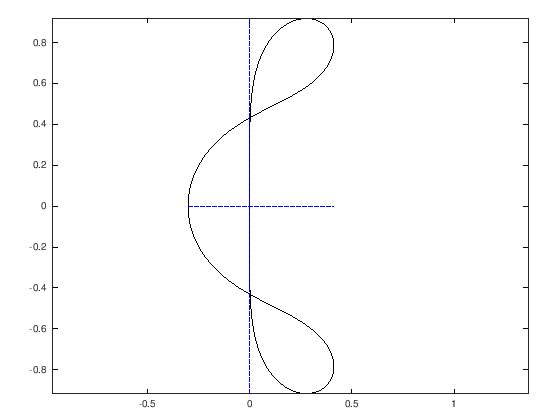

In [4]:
LW = 'LineWidth'; lw = 1;
clr = [221 221 221]/255;
% Az egysegkor definialasa
N = 1000;
theta = linspace(0,2*pi,N);
xi = exp(1i*theta);

% Az egyes karakterisztikus polinomok (\pi(xi)=0 egyenletre vonatkozoan)
%f = @(xi)(2*xi.^2-2*xi)./(3*xi-1); % AB2
%f=@(xi)(12*(xi.^3-xi.^2))./(23*xi.^2-16*xi+5); %AB3
f=@(xi) 24*(xi.^4-xi.^3)./(55*xi.^3 - 59*xi.^2 + 37*xi - 9); %AB4 %%fill(real(z(real(z)<=0)),imag(z(real(z)<=0)),clr)
%f=@(xi)(12*(xi.^2-xi))./(5*xi.^2+8*xi-1); %AM3
%f=@(xi)(12*(xi.^2-xi))./(5*xi.^2+8*xi-1); %AM5
%f=@(xi)(3*xi.^2-4*xi+1)./(2*xi.^2); %BDF2
%f=@(xi)(11*xi.^3-18*xi.^2+9*xi-2)./(6*xi.^3); %BDF3


z = f(xi);
plot(z,'k-',LW,lw), hold on
%fill(real(z),imag(z),clr)
plot([min(real(z)) max(real(z))],[0 0],'b--',LW,lw)
plot([0 0],[min(imag(z)) max(imag(z))],'b--',LW,lw)
axis tight, axis equal, hold off